### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [97]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import table 

# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)
purchase_data

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44
...,...,...,...,...,...,...,...
775,775,Aethedru70,21,Female,60,Wolf,3.54
776,776,Iral74,21,Male,164,Exiled Doomblade,1.63
777,777,Yathecal72,20,Male,67,"Celeste, Incarnation of the Corrupted",3.46
778,778,Sisur91,7,Male,92,Final Critic,4.19


## Player Count

* Display the total number of players


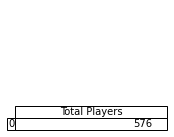

In [106]:
unique_players = pd.unique(purchase_data['SN'])
                          
total_players = len(unique_players) 

unique_players_df = pd.DataFrame({"Total Players": [total_players]}) 
unique_players_df  



## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [94]:
item_count = len((pd.unique(purchase_data['Item ID'])))
average_price = round(purchase_data['Price'].mean(),2)
total_purchases = purchase_data['Price'].count()
total_revenue = purchase_data['Price'].sum()



summary_df = pd.DataFrame({"Number of Unique Items": [item_count],
                               "Average Price": average_price,
                               "Number of Purchases": total_purchases,
                               "Total Revenue": (total_revenue)})
summary_df


,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,179,3.05,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [75]:

clean_duplicates_df = pd.DataFrame(purchase_data.drop_duplicates(["SN"]))

grouped_gender_count_df = clean_duplicates_df.groupby(['Gender'])

gender_count = grouped_gender_count_df["Purchase ID"].count()

gender_percent = (round((grouped_gender_count_df["Purchase ID"].count())/(total_players),4)*100)


gender_summary_df = pd.DataFrame({"Total Count ": gender_count,
                                  "Percent of Players": (gender_percent.map("{:,.2f}%".format))})

gender_summary_df



,Total Count,Percent of Players
Gender,,
Female,81,14.06%
Male,484,84.03%
Other / Non-Disclosed,11,1.91%



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [16]:
'random_str{num}'.format(num=1)

'random_str1'

In [17]:
def double(some_num):
    return some_num*2

In [18]:
gender_total_price = grouped_gender_df["Price"].sum()
gender_total_price

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

,Purchase Count,Average Price,Total Purchase Value,Avg Total Purchase per Person
Gender,,,,
Female,$113.00,$3.20,$361.94,$4.47
Male,$652.00,$3.02,"$1,967.64",$4.07
Other / Non-Disclosed,$15.00,$3.35,$50.19,$4.56


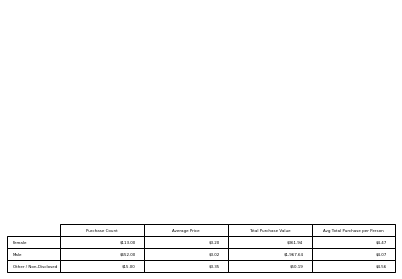

In [120]:
grouped_gender_df = purchase_data.groupby(['Gender'])


gender_purchase_count = grouped_gender_df["Purchase ID"].count()
gender_average_price = round(grouped_gender_df["Price"].mean(),2)
gender_total_price = grouped_gender_df["Price"].sum() 

gender_average_price_per = round((gender_total_price)/(gender_count),2)


gender_math_summary_df = pd.DataFrame({"Purchase Count": gender_purchase_count,
                                    "Average Price": gender_average_price,
                                       "Total Purchase Value": gender_total_price,
                                      "Avg Total Purchase per Person":gender_average_price_per}).applymap("${:,.2f}".format)

gender_math_summary_df


ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, gender_math_summary_df )  # where df is your data frame

plt.savefig('gendery_summary.png')

gender_math_summary_df


In [44]:
purchase_data.dtypes

Purchase ID      int64
SN              object
Age              int64
Gender          object
Item ID          int64
Item Name       object
Price          float64
dtype: object

## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [46]:
#Creating Bins  0 10 15 20 25 30 35 40    <10, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40+
# bins=["0", "9", "14", "19", "24", "29", "34"," 39", "+inf"] ==> Can you have inf as last bins

# clean_duplicates_df = pd.DataFrame(purchase_data.drop_duplicates(["SN"])) ==> From Earlier


bins=[0, 9, 14, 19, 24, 29, 34,39, 99]  ###==> Numeric not in quotes 

group_labels = ["<10", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39", "40+"]

pd.cut(clean_duplicates_df["Age"], bins, labels=group_labels).head()


clean_duplicates_df["Age Group"] = pd.cut(clean_duplicates_df["Age"], bins, labels=group_labels)

age_group = clean_duplicates_df.groupby("Age Group")



age_group_count = age_group[["Age"]].count() 

age_group_percentage = (age_group_count)/(total_players)




(age_group_percentage*100).applymap("{:,.2f}%".format)





,Age
Age Group,
<10,2.95%
10-14,3.82%
15-19,18.58%
20-24,44.79%
25-29,13.37%
30-34,9.03%
35-39,5.38%
40+,2.08%


In [57]:
agg_group_puchase_count = age_group["Purchase ID"].count().map("${:,.2f}".format)
agg_group_puchase_price = round(age_group["Price"].mean(),2).map("${:,.2f}".format)
agg_group_puchase_price = age_group["Price"].sum().map("${:,.2f}".format)





## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

,Purchase Count,Average Price,Total Purchase Value
Age Group,,,
<10,$17.00,$57.63,$57.63
10-14,$22.00,$67.64,$67.64
15-19,$107.00,$331.88,$331.88
20-24,$258.00,$790.39,$790.39
25-29,$77.00,$223.93,$223.93
30-34,$52.00,$151.92,$151.92
35-39,$31.00,$108.81,$108.81
40+,$12.00,$36.45,$36.45


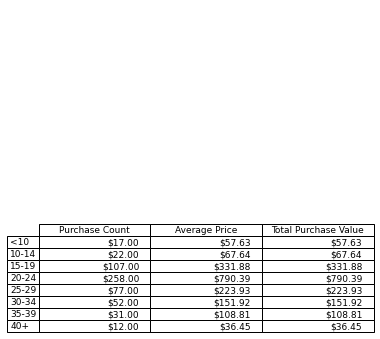

In [121]:
age_summary_df = pd.DataFrame({"Purchase Count": agg_group_puchase_count,
                                    "Average Price": agg_group_puchase_price,
                                       "Total Purchase Value": agg_group_puchase_price})


ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, age_summary_df )  # where df is your data frame

plt.savefig('age_summary.png')


age_summary_df

## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [81]:
# 1 - Calc the total count per person
#2 - Calc average price per person 
#3 - Total Purchases Total 
#4-  Sort data to display top SN account 

# We will need to totals per SN account? 

sn_purchase_count = purchase_data.groupby(['SN'])['Price'].count()

sn_average = round(purchase_data.groupby(['SN'])['Price'].mean(),2)

sn_total_purchases = purchase_data.groupby(['SN'])['Price'].sum()

#sn_purchase_count
#sn_average 
#sn_total_purchases

sn_summary_df = pd.DataFrame({"Purchase Count": sn_purchase_count,
                                    "Average Price": sn_average ,
                                       "Total Purchase Value":sn_total_purchases})

sn_summary_df.sort_values(by='Purchase Count', ascending=False).head() 

,Purchase Count,Average Price,Total Purchase Value
SN,,,
Lisosia93,5,3.79,18.96
Iral74,4,3.40,13.62
Idastidru52,4,3.86,15.45
Asur53,3,2.48,7.44
Inguron55,3,3.70,11.11


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



,,Purchase Count,Item Price,Total Purchase Value,Avg Total Purchase per Person
Item ID,Item Name,,,,
92,Final Critic,13,$4.61,$59.99,$4.61
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76,$4.23
145,Fiery Glass Crusader,9,$4.58,$41.22,$4.58
132,Persuasion,9,$3.22,$28.99,$3.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77,$3.53


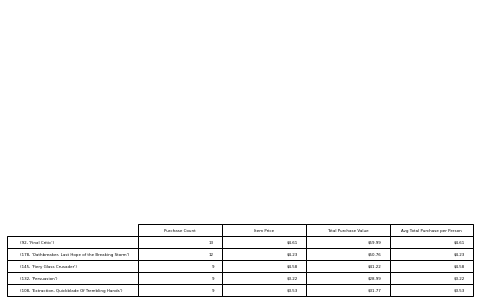

In [126]:
#popular_items_df = purchase_data[["Item ID","Item Name","Price"]]

#grouped_items_df = popular_items_df.groupby(["Item ID","Item Name"]
                                           #)['Price'].agg(['count','sum']
                                                         #).sort_values(by='count', ascending=False)

grouped_items_df = purchase_data.groupby(["Item ID","Item Name"])

item_count_value =grouped_items_df['Price'].count()
item_total_value =round(grouped_items_df['Price'].sum(),2).map("${:,.2f}".format)
item_average_value =round(grouped_items_df['Price'].mean(),2).map("${:,.2f}".format)
            
            
grouped_items_df.head()

grouped_summary_df = pd.DataFrame({"Purchase Count": item_count_value,
                                    "Item Price": item_average_value ,
                                       "Total Purchase Value": item_total_value,
                                      "Avg Total Purchase per Person":item_average_value}).sort_values(by='Purchase Count', ascending=False)


ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, grouped_summary_df.head())  # where df is your data frame

plt.savefig('most_popular_summary.png')

grouped_summary_df.head()

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [127]:
grouped_items_least_df = pd.DataFrame({"Purchase Count": item_count_value,
                                    "Item Price": item_average_value ,
                                       "Total Purchase Value": item_total_value,
                                      "Avg Total Purchase per Person":item_average_value}).sort_values(by='Purchase Count', ascending=True)

grouped_items_least_df.head(15)

,,Purchase Count,Item Price,Total Purchase Value,Avg Total Purchase per Person
Item ID,Item Name,,,,
91,Celeste,1,$4.17,$4.17,$4.17
118,"Ghost Reaver, Longsword of Magic",1,$2.17,$2.17,$2.17
134,Undead Crusader,1,$4.50,$4.50,$4.50
27,"Riddle, Tribute of Ended Dreams",1,$3.30,$3.30,$3.30
104,Gladiator's Glaive,1,$1.93,$1.93,$1.93
42,The Decapitator,1,$1.75,$1.75,$1.75
90,Betrayer,1,$2.94,$2.94,$2.94
47,"Alpha, Reach of Ending Hope",1,$3.58,$3.58,$3.58
51,Endbringer,1,$4.66,$4.66,$4.66
